**Tema:** Previsão do preço de um carro com base em Idade, Quilometragem e Potência.

**Dataset:** preco_carros.csv

Fluxo da atividade:
- Importação das bibliotecas
- Leitura do dataset
- Separação das variáveis X e y
- Divisão em treino/teste
- Criação e treinamento do modelo
- Avaliação do modelo
- Previsão para um novo exemplo
- Visualização dos resultados

## 1️⃣ Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 2️⃣ Leitura do dataset

In [113]:
df = pd.read_csv("preco_carros.csv")
df.head()

,Idade,Quilometragem,Potencia,Preco
0,6,146688,212,88793.65
1,3,107665,99,85493.84
2,12,110373,239,87559.70
3,14,186144,191,71848.87
4,10,29574,194,87272.33


## 3️⃣ Separação das variáveis X e y

In [117]:
# X -> múltiplas variáveis
X = df[['Idade', 'Quilometragem', 'Potencia']]

# y -> Preço
y = df['Preco']

X.head()

,Idade,Quilometragem,Potencia
0,6,146688,212
1,3,107665,99
2,12,110373,239
3,14,186144,191
4,10,29574,194


## 4️⃣ Divisão em treino e teste

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5️⃣ Criação e treinamento do modelo

In [121]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

## 6️⃣ Avaliação do modelo

In [123]:
y_pred = modelo.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse:.2f}")
print(f"Raiz do Erro Médio Quadrático (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Médio Quadrático (MSE): 8808531.88
Raiz do Erro Médio Quadrático (RMSE): 2967.92
Coeficiente de Determinação (R²): 0.94


## 7️⃣ Previsão para um novo exemplo

In [125]:
# Exemplo: carro com 5 anos, 50000 km, 150 cv
novo_carro = pd.DataFrame([[5, 50000, 150]], columns=['Idade', 'Quilometragem', 'Potencia'])
preco_previsto = modelo.predict(novo_carro)

print(f"Preço previsto para o novo carro: R$ {preco_previsto[0]:.2f}")

Preço previsto para o novo carro: R$ 90027.40


## 8️⃣ Visualização dos resultados

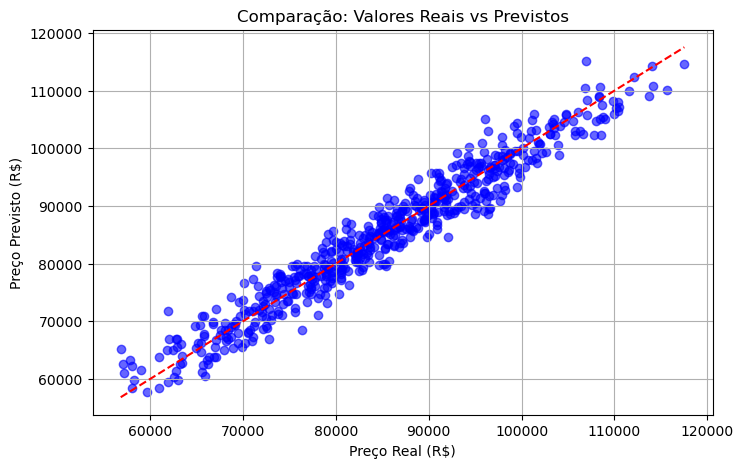

In [127]:
# Gráfico de comparação y_test vs y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Comparação: Valores Reais vs Previstos')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.grid()
plt.show()